In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [170]:
retail = pd.read_excel('Online Retail.xlsx')
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [171]:
retail.info

<bound method DataFrame.info of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  Cust

In [172]:
retail.shape
print('The Dataset has ' + str(retail.shape[0]) + ' rows and ' + str(retail.shape[1]) + ' columns')

The Dataset has 541909 rows and 8 columns


Data Definitions: Column names, Data Types, Description of Columns, Counts and Percents of Unique Values, Ranges of Values

In [173]:
retail.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

Checking for missing values in dataset

In [174]:
missing_values = pd.concat([retail.isnull().sum(), 100 * retail.isnull().mean()], axis=1)
missing_values.rename(columns={0: 'Count', 1: 'Percent'}, inplace=True)
missing_values

,Count,Percent
InvoiceNo,0,0.000000
StockCode,0,0.000000
Description,1454,0.268311
Quantity,0,0.000000
InvoiceDate,0,0.000000
UnitPrice,0,0.000000
CustomerID,135080,24.926694
Country,0,0.000000


There are 1454 items without a description in the "Description" column in the dataset. This accounts for .27% of the total dataset. There are 135080 rows without a "CustomerID", which is about 25% of the dataset. 

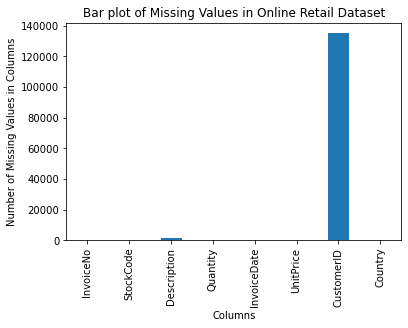

In [175]:
missing_values['Count'].plot(kind='bar')
plt.title('Bar plot of Missing Values in Online Retail Dataset')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values in Columns')
plt.show()

In [176]:
retail.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

CustomerID column is of float64 data type. They should be integers to correctly represent each customer. Also since CustomerID column has null values. These values must removed first before converting the entire column to int64 datatype.

In [177]:
retail.isna().any()

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

In [178]:
free = retail['UnitPrice'] == 0.0
df = retail[~free]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [179]:
df.groupby('UnitPrice')['Description'].value_counts()

UnitPrice   Description               
-11062.060  Adjust bad debt               2
 0.001      PADS TO MATCH ALL CUSHIONS    3
            Bank Charges                  1
 0.010      Discount                      1
 0.030      Discount                      1
                                         ..
 13541.330  AMAZON FEE                    3
 16453.710  AMAZON FEE                    1
 16888.020  AMAZON FEE                    1
 17836.460  AMAZON FEE                    1
 38970.000  Manual                        1
Name: Description, Length: 16144, dtype: int64

In [180]:
df.StockCode.nunique()

3938

In [181]:
duplicates = df.duplicated(['StockCode', 'InvoiceNo'], keep=False)
df_dup = df[duplicates].sort_values('CustomerID')

In [182]:
df = df.drop_duplicates(keep=False)

df[duplicates].sort_values('CustomerID')

<ipython-input-182-18dcb513b598>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[duplicates].sort_values('CustomerID')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
34097,539318,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,2010-12-16 19:09:00,0.55,12348.0,Finland
34088,539318,21213,PACK OF 72 SKULL CAKE CASES,120,2010-12-16 19:09:00,0.42,12348.0,Finland
34098,539318,21977,PACK OF 60 PINK PAISLEY CAKE CASES,120,2010-12-16 19:09:00,0.42,12348.0,Finland
34087,539318,21213,PACK OF 72 SKULL CAKE CASES,24,2010-12-16 19:09:00,0.55,12348.0,Finland
34086,539318,84991,60 TEATIME FAIRY CAKE CASES,120,2010-12-16 19:09:00,0.42,12348.0,Finland
...,...,...,...,...,...,...,...,...
541273,581497,21481,FAWN BLUE HOT WATER BOTTLE,1,2011-12-09 10:23:00,10.29,NaN,United Kingdom
541287,581497,22356,CHARLOTTE BAG PINK POLKADOT,25,2011-12-09 10:23:00,2.46,NaN,United Kingdom
541288,581497,22356,CHARLOTTE BAG PINK POLKADOT,1,2011-12-09 10:23:00,5.63,NaN,United Kingdom
541308,581497,23206,LUNCH BAG APPLE DESIGN,3,2011-12-09 10:23:00,4.96,NaN,United Kingdom


In [183]:
df[df['StockCode'] == 'D']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
9038,C537164,D,Discount,-1,2010-12-05 13:21:00,29.29,14527.0,United Kingdom
14498,C537597,D,Discount,-1,2010-12-07 12:34:00,281.00,15498.0,United Kingdom
19392,C537857,D,Discount,-1,2010-12-08 16:00:00,267.12,17340.0,United Kingdom
31134,C538897,D,Discount,-1,2010-12-15 09:14:00,5.76,16422.0,United Kingdom
...,...,...,...,...,...,...,...,...
479868,C577227,D,Discount,-1,2011-11-18 12:06:00,19.82,14527.0,United Kingdom
479869,C577227,D,Discount,-1,2011-11-18 12:06:00,16.76,14527.0,United Kingdom
493613,C578239,D,Discount,-1,2011-11-23 12:29:00,26.33,14912.0,Italy
516221,C579884,D,Discount,-1,2011-11-30 17:34:00,20.53,14527.0,United Kingdom


In [184]:
df[df['StockCode'] == 'M']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2239,536569,M,Manual,1,2010-12-01 15:35:00,1.25,16274.0,United Kingdom
2250,536569,M,Manual,1,2010-12-01 15:35:00,18.95,16274.0,United Kingdom
5684,536865,M,Manual,1,2010-12-03 11:28:00,2.55,NaN,United Kingdom
6798,536981,M,Manual,2,2010-12-03 14:26:00,0.85,14723.0,United Kingdom
7976,537077,M,Manual,12,2010-12-05 11:59:00,0.42,17062.0,United Kingdom
...,...,...,...,...,...,...,...,...
531432,580956,M,Manual,4,2011-12-06 14:23:00,1.25,17841.0,United Kingdom
533082,C581009,M,Manual,-1,2011-12-07 09:15:00,125.00,16971.0,United Kingdom
534308,C581145,M,Manual,-1,2011-12-07 13:48:00,9.95,17490.0,United Kingdom
538321,581405,M,Manual,3,2011-12-08 13:50:00,0.42,13521.0,United Kingdom


In [185]:
one_letter = df['StockCode'].str.len() == 1
df[one_letter]['Description'].value_counts()

Manual             560
Discount            77
SAMPLES             61
Adjust bad debt      3
Name: Description, dtype: int64

In [186]:
negative = df['Quantity'] <= 0
df = df[~negative]

In [187]:
df.describe()


,Quantity,UnitPrice,CustomerID
count,520038.000000,520038.000000,387883.000000
mean,10.686665,3.894190,15281.730762
std,156.989293,42.257685,1713.926205
min,1.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13941.000000
50%,4.000000,2.080000,15144.000000
75%,12.000000,4.130000,16788.000000
max,80995.000000,13541.330000,18287.000000


In [188]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [189]:
df[df['Quantity'] <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [190]:
df = df[~one_letter]

<ipython-input-190-09d9061e8b2f>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[~one_letter]


In [191]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [192]:
more_than_one = df['Quantity'] > 1
df = df[more_than_one] 

In [193]:
df.StockCode.nunique()

3716

In [194]:
null = df.CustomerID.isna()
df['CustomerID'] = df['CustomerID'].fillna(0)

In [195]:
df['CustomerID'] = df['CustomerID'].astype('int')

In [196]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [197]:
df['Year'] = df['InvoiceDate'].dt.year

In [198]:
customers_country = df.groupby('Country').CustomerID.nunique().reset_index()
customers_country.columns = ['Country', 'Customers']
customers_country

,Country,Customers
0,Australia,9
1,Austria,11
2,Bahrain,3
3,Belgium,25
4,Brazil,1
5,Canada,4
6,Channel Islands,9
7,Cyprus,8
8,Czech Republic,1
9,Denmark,9


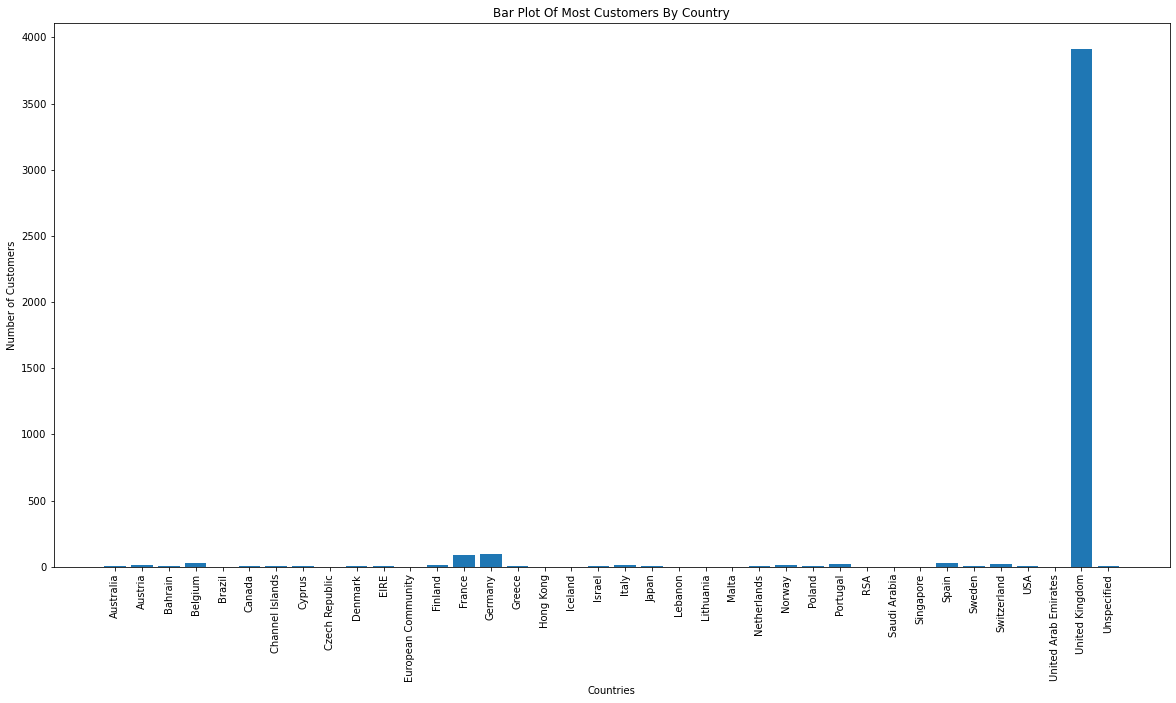

In [199]:
fig = plt.figure(figsize=(20,10))
ax = plt.subplot()
ax.bar(customers_country['Country'], customers_country['Customers'])
plt.xticks(rotation=90)
plt.title('Bar Plot Of Most Customers By Country')
plt.xlabel('Countries')
plt.ylabel('Number of Customers')
plt.show()

In [200]:
orders_country = df.groupby('Country').InvoiceNo.nunique().reset_index()
orders_country.columns = ['Country', 'Count']
orders_country


,Country,Count
0,Australia,56
1,Austria,17
2,Bahrain,3
3,Belgium,98
4,Brazil,1
5,Canada,5
6,Channel Islands,25
7,Cyprus,14
8,Czech Republic,2
9,Denmark,18


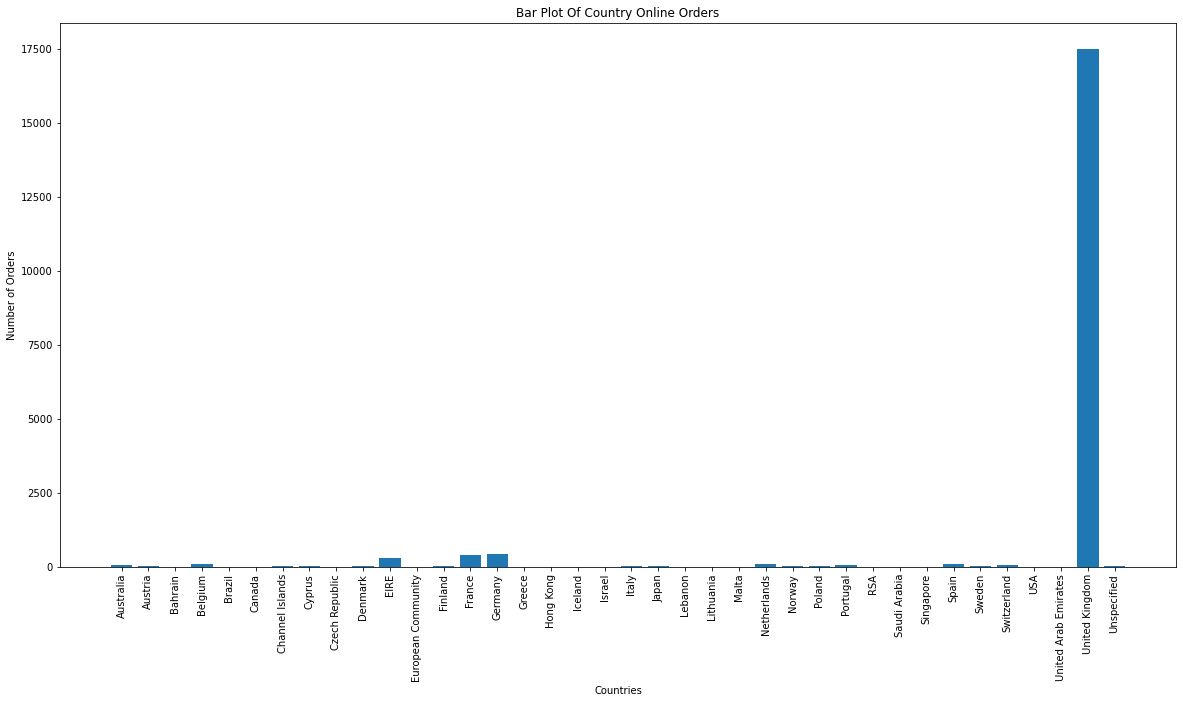

In [201]:
fig = plt.figure(figsize=(20,10))
ax = plt.subplot()
ax.bar(orders_country['Country'], orders_country['Count'])
plt.xticks(rotation=90)
plt.title('Bar Plot Of Country Online Orders')
plt.xlabel('Countries')
plt.ylabel('Number of Orders')
plt.show()

In [202]:
orders = df.groupby('Description').InvoiceNo.nunique().reset_index()
orders.columns = ['product', 'item_count']
orders
orders = orders.sort_values(by='item_count', ascending=False)
topten = orders.head(10)

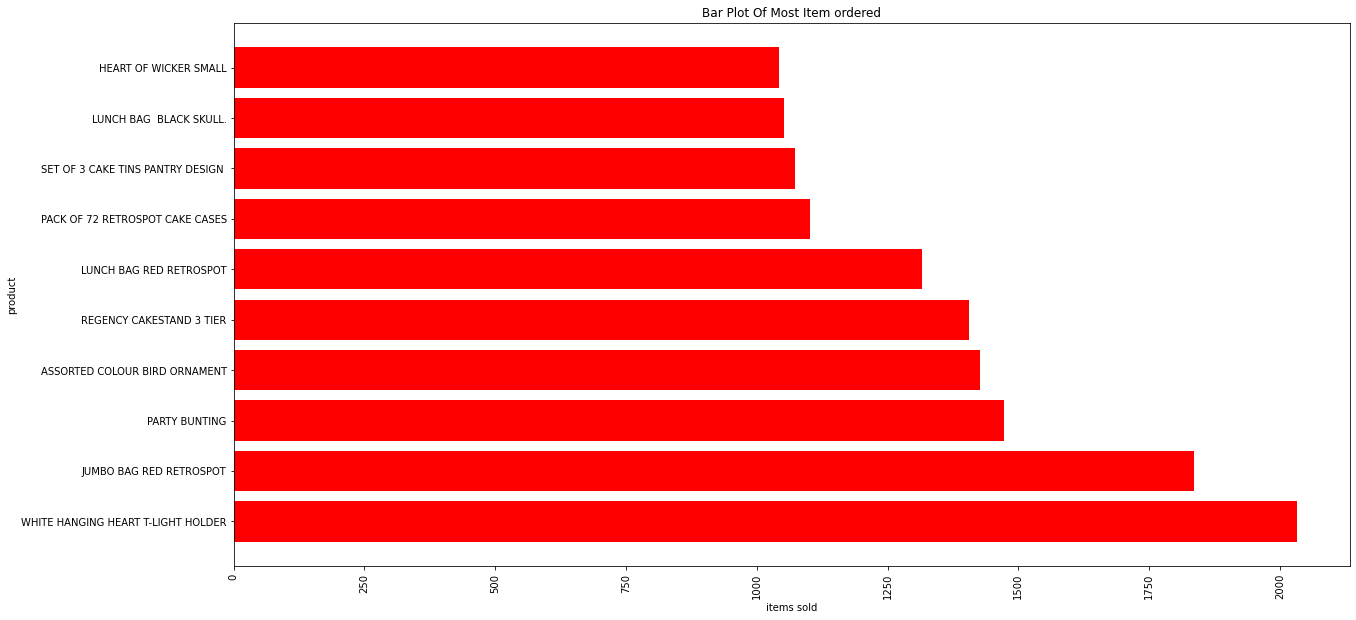

In [203]:
fig = plt.figure(figsize=(20,10))
ax = plt.subplot()
ax.barh(topten['product'], topten['item_count'], color='r')
plt.xticks(rotation=90)
plt.title('Bar Plot Of Most Item ordered')
plt.xlabel('items sold')
plt.ylabel('product')
plt.show()

In [204]:
non_uk = df[df['Country'] != 'United Kingdom']
non_uk = non_uk.groupby('Country').InvoiceNo.nunique().reset_index()
non_uk.columns = ['Country', 'Orders']
non_uk

,Country,Orders
0,Australia,56
1,Austria,17
2,Bahrain,3
3,Belgium,98
4,Brazil,1
5,Canada,5
6,Channel Islands,25
7,Cyprus,14
8,Czech Republic,2
9,Denmark,18


In [205]:
df['Hour'] = df['InvoiceDate'].dt.hour

In [209]:
time = df.groupby('Hour').UnitPrice.sum().reset_index()
time.columns = ['Hour', 'TotalSales']
time

,Hour,TotalSales
0,7,1336.22
1,8,26369.40
2,9,81189.88
3,10,116887.50
4,11,116026.31
5,12,153516.32
6,13,142680.75
7,14,132125.90
8,15,140246.33
9,16,84222.28


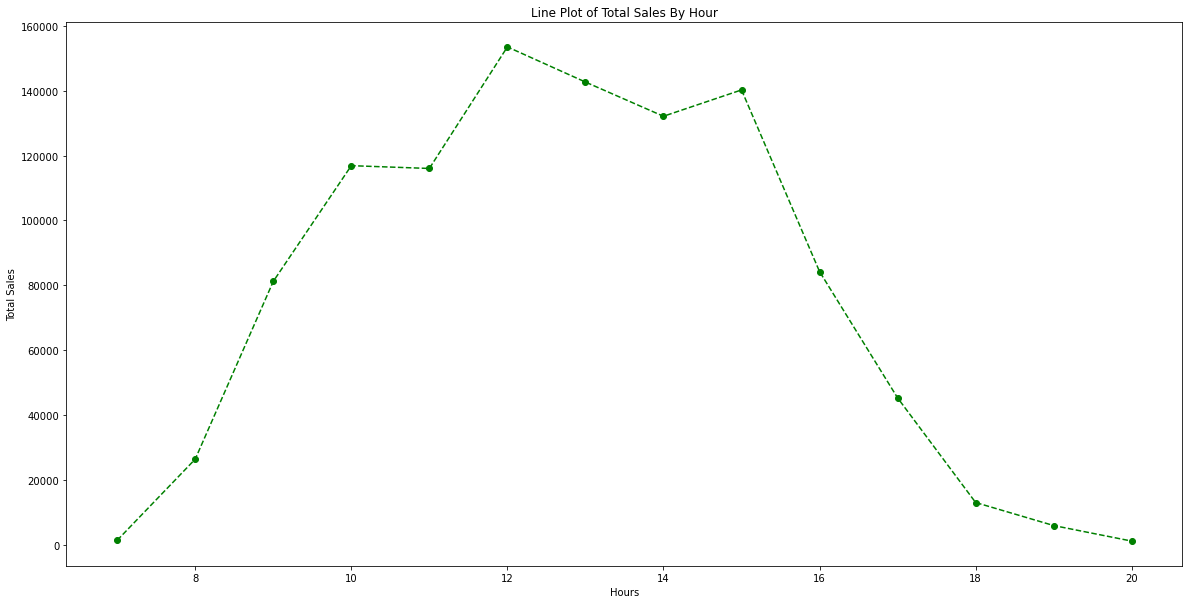

In [210]:
plt.figure(figsize=(20, 10))
plt.plot(time['Hour'], time['TotalSales'], marker='o', linestyle='--', color='g')
plt.title('Line Plot of Total Sales By Hour')
plt.xlabel('Hours')
plt.ylabel('Total Sales')
plt.show()